#CORRELAÇÃO EXPORTAÇÃO E COMERCIALIZAÇÃO

In [1]:
import pandas as pd

# Carregar os dois arquivos Excel
file1 = pd.read_excel('/content/exportacao.xlsx')
file2 = pd.read_excel('/content/comercializacao.xlsx')

# Exibir as primeiras linhas de ambos os arquivos para verificar
print(file1.head())
print(file2.head())


  Sigla   Codigo     Município          1993          1994          1995  \
0    AC  1200013    Acrelândia  0.000000e+00  0.000000e+00  2.174952e+04   
1    AC  1200054  Assis Brasil  1.257013e+05  1.764378e+06  2.945352e+05   
2    AC  1200104     Brasiléia  6.372471e+06  5.486467e+06  3.067611e+06   
3    AC  1200138        Bujari  0.000000e+00  0.000000e+00  5.698636e+05   
4    AC  1200179      Capixaba  0.000000e+00  0.000000e+00  0.000000e+00   

           1996          1997          1998          1999  ...          2013  \
0  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...  1.352667e+07   
1  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...  2.793613e+06   
2  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...  1.268751e+07   
3  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...  1.807742e+07   
4  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...  8.768095e+06   

           2014          2015          2016          2017     

In [2]:
# Definindo os anos para selecionar as colunas
anos = [str(ano) for ano in range(1993, 2023)]

# Selecionando as colunas de interesse em cada arquivo
file1_anos = file1[['Sigla', 'Codigo', 'Município'] + anos]
file2_anos = file2[['Sigla', 'Codigo', 'Município'] + anos]

# Verificar as primeiras linhas para garantir que está correto
print(file1_anos.head())
print(file2_anos.head())


  Sigla   Codigo     Município          1993          1994          1995  \
0    AC  1200013    Acrelândia  0.000000e+00  0.000000e+00  2.174952e+04   
1    AC  1200054  Assis Brasil  1.257013e+05  1.764378e+06  2.945352e+05   
2    AC  1200104     Brasiléia  6.372471e+06  5.486467e+06  3.067611e+06   
3    AC  1200138        Bujari  0.000000e+00  0.000000e+00  5.698636e+05   
4    AC  1200179      Capixaba  0.000000e+00  0.000000e+00  0.000000e+00   

           1996          1997          1998          1999  ...          2013  \
0  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...  1.352667e+07   
1  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...  2.793613e+06   
2  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...  1.268751e+07   
3  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...  1.807742e+07   
4  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...  8.768095e+06   

           2014          2015          2016          2017     

In [3]:
# Unir os arquivos com base no código do município
dados_combinados = pd.merge(file1_anos, file2_anos, on='Codigo', suffixes=('_file1', '_file2'))

# Verificar as primeiras linhas após o merge
print(dados_combinados.head())


  Sigla_file1   Codigo Município_file1    1993_file1    1994_file1  \
0          AC  1200013      Acrelândia  0.000000e+00  0.000000e+00   
1          AC  1200054    Assis Brasil  1.257013e+05  1.764378e+06   
2          AC  1200104       Brasiléia  6.372471e+06  5.486467e+06   
3          AC  1200138          Bujari  0.000000e+00  0.000000e+00   
4          AC  1200179        Capixaba  0.000000e+00  0.000000e+00   

     1995_file1    1996_file1    1997_file1    1998_file1    1999_file1  ...  \
0  2.174952e+04  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...   
1  2.945352e+05  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...   
2  3.067611e+06  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...   
3  5.698636e+05  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...   
4  0.000000e+00  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...   

   2013_file2  2014_file2  2015_file2  2016_file2  2017_file2  2018_file2  \
0         0.0        

In [4]:
# Inicializar um dicionário para armazenar as correlações
correlacoes = {}

# Calcular a correlação para cada ano
for ano in anos:
    coluna_file1 = f'{ano}_file1'
    coluna_file2 = f'{ano}_file2'
    correlacao = dados_combinados[coluna_file1].corr(dados_combinados[coluna_file2])
    correlacoes[ano] = correlacao

# Exibir as correlações para cada ano
print(correlacoes)


{'1993': 0.08503024338462645, '1994': 0.2819123180421807, '1995': 0.14841344668713857, '1996': 0.1465964968014016, '1997': 0.09933086564193212, '1998': 0.5412943574186758, '1999': 0.4943252313550904, '2000': 0.44527350184603964, '2001': 0.5403772596546519, '2002': 0.5803618509113673, '2003': 0.5283446613630239, '2004': 0.5018951449238409, '2005': 0.4033089503030411, '2006': 0.5868259927341251, '2007': 0.6007164192895865, '2008': 0.5827423113175991, '2009': 0.789561041082682, '2010': 0.7337004675015089, '2011': 0.5495688445612548, '2012': 0.4190905328562933, '2013': 0.48118719654394115, '2014': 0.5409686698541029, '2015': 0.4249416328481374, '2016': 0.6261280440177762, '2017': 0.46792599179903954, '2018': 0.382331382635552, '2019': 0.27469377776791726, '2020': 0.40020557814453883, '2021': 0.5059440656819527, '2022': 0.1955457337634073}


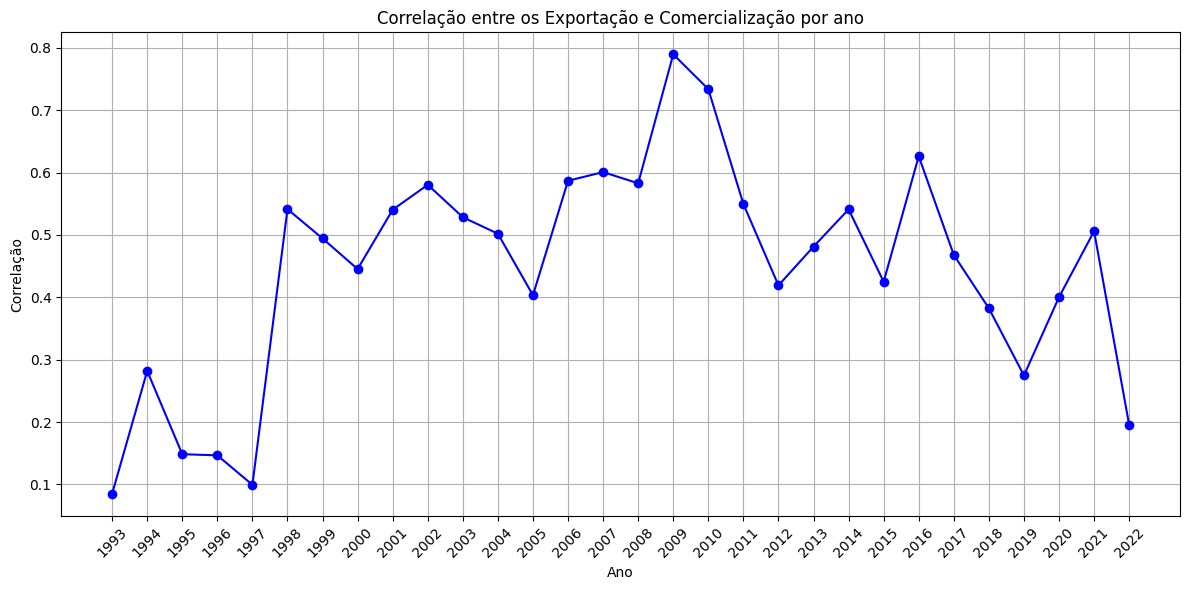

In [6]:
import matplotlib.pyplot as plt

# Criando o gráfico das correlações por ano
plt.figure(figsize=(12, 6))  # Aumenta o tamanho do gráfico
plt.plot(correlacoes.keys(), correlacoes.values(), marker='o', color='b')

# Ajustando o layout para melhor visualização
plt.title('Correlação entre os Exportação e Comercialização por ano')
plt.xlabel('Ano')
plt.ylabel('Correlação')
plt.xticks(rotation=45)  # Rotacionar os anos para evitar sobreposição
plt.grid(True)

# Exibir o gráfico com espaçamento adequado
plt.tight_layout()
plt.show()


#Correlação Exportação e Comercialização por Região

In [19]:
import pandas as pd

# Dicionário de mapeamento de siglas para regiões
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Função para mapear siglas para regiões
def mapear_regiao(sigla):
    for regiao, siglas in regioes.items():
        if sigla in siglas:
            return regiao
    return 'Desconhecido'

# Carregar os arquivos
comercializacao = pd.read_excel("comercializacao.xlsx")
exportacao = pd.read_excel("exportacao.xlsx")

# Verificar se a coluna 'Sigla' existe
if "Sigla" not in comercializacao.columns or "Sigla" not in exportacao.columns:
    raise ValueError("A coluna 'Sigla' não está presente em um dos arquivos.")

# Adicionar a coluna de Região
comercializacao["Região"] = comercializacao["Sigla"].apply(mapear_regiao)
exportacao["Região"] = exportacao["Sigla"].apply(mapear_regiao)

# Selecionar apenas colunas numéricas (evitar erros com colunas de texto)
comercializacao_numeric = comercializacao.select_dtypes(include=['int64', 'float64'])
exportacao_numeric = exportacao.select_dtypes(include=['int64', 'float64'])

# Identificar os anos que estão presentes em ambos os arquivos
anos_comuns = list(set(comercializacao_numeric.columns) & set(exportacao_numeric.columns))

# Criar um dicionário para armazenar as correlações por região e ano
correlacoes = {}

# Calcular correlação para cada região
for regiao in regioes.keys():
    df_com = comercializacao[comercializacao["Região"] == regiao][anos_comuns]
    df_exp = exportacao[exportacao["Região"] == regiao][anos_comuns]

    # Garantir que os DataFrames tenham dados suficientes e os mesmos índices
    if not df_com.empty and not df_exp.empty:
        df_com = df_com.sort_index()
        df_exp = df_exp.sort_index()

        # Alinhar os índices para evitar problemas de dimensão
        df_com, df_exp = df_com.align(df_exp, join="inner", axis=0)

        correlacao = df_com.corrwith(df_exp, axis=0)
        correlacoes[regiao] = correlacao

# Criar um DataFrame com as correlações
correlacao_regioes_df = pd.DataFrame(correlacoes)

# Ordenar os anos para exibição clara
correlacao_regioes_df = correlacao_regioes_df.sort_index()

# Exibir a tabela final de correlações
print(correlacao_regioes_df)


           Norte  Nordeste  Centro-Oeste   Sudeste       Sul
1993   -0.003149 -0.000083      0.011615 -0.012482 -0.013848
1994   -0.003376  0.070690      0.057570 -0.016861  0.020774
1995   -0.014403  0.005422      0.083103  0.015115 -0.002315
1996         NaN  0.078573     -0.012726 -0.008279 -0.028231
1997         NaN  0.019143     -0.020515  0.024402 -0.032865
1998    0.183730 -0.009103      0.030453 -0.007824 -0.009609
1999    0.040689 -0.008052     -0.017513 -0.014877 -0.012655
2000    0.566061  0.014909      0.002553 -0.012451 -0.014763
2001    0.891376  0.012838     -0.019452 -0.001770 -0.009873
2002    0.276311  0.101724     -0.005917 -0.000765 -0.010991
2003    0.135751  0.012677      0.009098 -0.006323 -0.015250
2004    0.205834  0.046568      0.023527 -0.006111 -0.012353
2005    0.280312  0.040643      0.024629 -0.006270  0.004446
2006    0.175563  0.027461      0.016070 -0.003844  0.020479
2007    0.428465  0.025655      0.021569 -0.003976  0.025040
2008    0.415997  0.0006

In [39]:
# Exibir a tabela de correlação
correlacao_regioes_df


,Norte,Nordeste,Centro-Oeste,Sudeste,Sul
1993,-0.003149,-0.000083,0.011615,-0.012482,-0.013848
1994,-0.003376,0.070690,0.057570,-0.016861,0.020774
1995,-0.014403,0.005422,0.083103,0.015115,-0.002315
1996,NaN,0.078573,-0.012726,-0.008279,-0.028231
1997,NaN,0.019143,-0.020515,0.024402,-0.032865
1998,0.183730,-0.009103,0.030453,-0.007824,-0.009609
1999,0.040689,-0.008052,-0.017513,-0.014877,-0.012655
2000,0.566061,0.014909,0.002553,-0.012451,-0.014763
2001,0.891376,0.012838,-0.019452,-0.001770,-0.009873
2002,0.276311,0.101724,-0.005917,-0.000765,-0.010991


#CORRELAÇÃO EXPORTAÇÃO E INVESTIMENTO

In [7]:
# Carregar o arquivo "exportação" e "investimento"
file_exportacao = pd.read_excel('/content/exportacao.xlsx')
file_investimento = pd.read_excel('/content/investimento.xlsx')

# Exibir as primeiras linhas de ambos para garantir que o carregamento foi feito corretamente
print(file_exportacao.head())
print(file_investimento.head())


  Sigla   Codigo     Município          1993          1994          1995  \
0    AC  1200013    Acrelândia  0.000000e+00  0.000000e+00  2.174952e+04   
1    AC  1200054  Assis Brasil  1.257013e+05  1.764378e+06  2.945352e+05   
2    AC  1200104     Brasiléia  6.372471e+06  5.486467e+06  3.067611e+06   
3    AC  1200138        Bujari  0.000000e+00  0.000000e+00  5.698636e+05   
4    AC  1200179      Capixaba  0.000000e+00  0.000000e+00  0.000000e+00   

           1996          1997          1998          1999  ...          2013  \
0  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...  1.352667e+07   
1  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...  2.793613e+06   
2  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...  1.268751e+07   
3  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...  1.807742e+07   
4  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...  8.768095e+06   

           2014          2015          2016          2017     

In [8]:
# Selecionando as colunas relevantes para os dois arquivos
file_exportacao_anos = file_exportacao[['Sigla', 'Codigo', 'Município'] + anos]
file_investimento_anos = file_investimento[['Sigla', 'Codigo', 'Município'] + anos]

# Verificar as primeiras linhas para garantir que está correto
print(file_exportacao_anos.head())
print(file_investimento_anos.head())


  Sigla   Codigo     Município          1993          1994          1995  \
0    AC  1200013    Acrelândia  0.000000e+00  0.000000e+00  2.174952e+04   
1    AC  1200054  Assis Brasil  1.257013e+05  1.764378e+06  2.945352e+05   
2    AC  1200104     Brasiléia  6.372471e+06  5.486467e+06  3.067611e+06   
3    AC  1200138        Bujari  0.000000e+00  0.000000e+00  5.698636e+05   
4    AC  1200179      Capixaba  0.000000e+00  0.000000e+00  0.000000e+00   

           1996          1997          1998          1999  ...          2013  \
0  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...  1.352667e+07   
1  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...  2.793613e+06   
2  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...  1.268751e+07   
3  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...  1.807742e+07   
4  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...  8.768095e+06   

           2014          2015          2016          2017     

In [9]:
# Unir os arquivos de "exportação" e "investimento" com base no código do município
dados_combinados_exportacao_investimento = pd.merge(file_exportacao_anos, file_investimento_anos, on='Codigo', suffixes=('_exportacao', '_investimento'))

# Verificar as primeiras linhas após o merge
print(dados_combinados_exportacao_investimento.head())


  Sigla_exportacao   Codigo Município_exportacao  1993_exportacao  \
0               AC  1200013           Acrelândia     0.000000e+00   
1               AC  1200054         Assis Brasil     1.257013e+05   
2               AC  1200104            Brasiléia     6.372471e+06   
3               AC  1200138               Bujari     0.000000e+00   
4               AC  1200179             Capixaba     0.000000e+00   

   1994_exportacao  1995_exportacao  1996_exportacao  1997_exportacao  \
0     0.000000e+00     2.174952e+04     5.083040e+06     1.180169e+06   
1     1.764378e+06     2.945352e+05     0.000000e+00     0.000000e+00   
2     5.486467e+06     3.067611e+06     4.860081e+05     8.188326e+05   
3     0.000000e+00     5.698636e+05     1.384419e+04     1.080466e+05   
4     0.000000e+00     0.000000e+00     0.000000e+00     1.047715e+05   

   1998_exportacao  1999_exportacao  ...  2013_investimento  \
0     3.603147e+06     3.962375e+06  ...       9.239851e+06   
1     2.443871e+05  

In [10]:
# Inicializar um dicionário para armazenar as correlações
correlacoes_exportacao_investimento = {}

# Calcular a correlação entre "exportação" e "investimento" para cada ano
for ano in anos:
    coluna_exportacao = f'{ano}_exportacao'
    coluna_investimento = f'{ano}_investimento'
    correlacao = dados_combinados_exportacao_investimento[coluna_exportacao].corr(dados_combinados_exportacao_investimento[coluna_investimento])
    correlacoes_exportacao_investimento[ano] = correlacao

# Exibir as correlações para cada ano
print(correlacoes_exportacao_investimento)


{'1993': 0.14170352847556997, '1994': 0.355701693295432, '1995': 0.23088462390859937, '1996': 0.2551405575586214, '1997': 0.2763085432167364, '1998': 0.2203398137382379, '1999': 0.24978328283256965, '2000': 0.33569280099179677, '2001': 0.3895315631067105, '2002': 0.42325114790370494, '2003': 0.32598535887308544, '2004': 0.2428257606155763, '2005': 0.40370621139514706, '2006': 0.24794279781600817, '2007': 0.3045131383222029, '2008': 0.31290154871037695, '2009': 0.26949734586526286, '2010': 0.2874982890656177, '2011': 0.4147956821942324, '2012': 0.46424691132420454, '2013': 0.40594541647177135, '2014': 0.3715409256068949, '2015': 0.45321108326515797, '2016': 0.2714542548171199, '2017': 0.37743847360302274, '2018': 0.35193240903272766, '2019': 0.407602236905192, '2020': 0.36544017029123166, '2021': 0.19722206925785088, '2022': 0.15367793443806327}


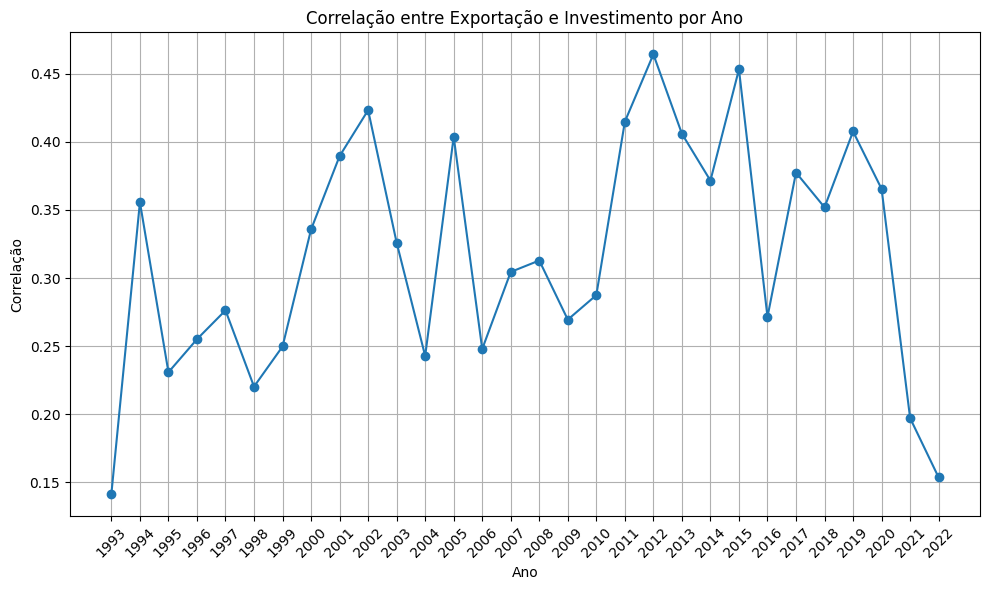

In [11]:
import matplotlib.pyplot as plt

# Criando o gráfico das correlações por ano
plt.figure(figsize=(10, 6))
plt.plot(correlacoes_exportacao_investimento.keys(), correlacoes_exportacao_investimento.values(), marker='o')

# Ajustando o layout
plt.title('Correlação entre Exportação e Investimento por Ano')
plt.xlabel('Ano')
plt.ylabel('Correlação')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os anos para evitar sobreposição

# Exibir o gráfico
plt.tight_layout()
plt.show()


#Correlação Exportação e Investimento por Região

In [38]:
import pandas as pd

# Criando o DataFrame com os dados fornecidos
dados_regioes = {
    'Ano': [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Norte': [0.026214, 0.112172, 0.020047, 0.038601, 0.02402, 0.028683, 0.066903, -0.014135, 0.044713, 0.052096, 0.094988, 0.129415, 0.10958, 0.073359, 0.019039, 0.026924, 0.141832, 0.175461, 0.100466, 0.14983, 0.136619, 0.136445, 0.120836, 0.306713, 0.216638, 0.217287, 0.156612, 0.198937, 0.203525, 0.015483],
    'Nordeste': [0.111752, 0.047229, 0.263576, 0.272021, 0.339249, 0.401834, 0.224442, 0.0568, 0.034442, 0.089187, 0.086692, 0.11818, 0.1173, 0.131181, 0.100987, 0.108018, 0.186374, 0.151145, 0.153493, 0.143895, 0.197034, 0.161596, 0.144079, 0.188871, 0.191093, 0.251417, 0.16993, 0.136299, 0.175182, 0.026972],
    'Centro-Oeste': [-0.003235, -0.005017, 0.029991, 0.028437, 0.077592, 0.000386, -0.019981, 0.022436, 0.011191, -0.006665, 0.024277, 0.005618, -0.006993, -0.01008, 0.008333, -0.002177, 0.016775, 0.010049, 0.022186, -0.000953, -0.000563, 0.027078, 0.002324, -0.020868, 0.009405, 0.023658, 0.023642, 0.013466, -0.005762, -0.005715],
    'Sudeste': [-0.008116, 0.049636, -0.009535, 0.000202, -0.024268, -0.008974, -0.00568, -0.011171, 0.012908, 0.00708, 0.016994, 0.000253, -0.00749, -0.007066, -0.022767, -0.019141, -0.014396, -0.015705, -0.003132, -0.007152, -0.007632, -0.008061, -0.003348, -0.001583, 0.013926, 0.004404, -0.000218, -0.019222, 0.004193, 0.007887],
    'Sul': [-0.004117, 0.125301, 0.03985, 0.00485, 0.020866, -0.026271, -0.011868, -0.001321, -0.009217, -8e-05, -0.030351, -0.017731, -0.03537, -0.02119, -0.020788, -0.024378, -0.025814, -0.017817, -0.022039, 0.004585, -0.010342, -0.002674, 0.018559, -0.004059, 0.018191, 0.024242, 0.004257, -0.010148, -0.008702, -0.022933]
}

# Criando o DataFrame
df_regioes = pd.DataFrame(dados_regioes)

# Salvando o DataFrame como um arquivo CSV
df_regioes.to_csv('/content/dados_regioes.csv', index=False)



In [37]:
# Exibindo todos os anos no DataFrame
df_regioes


,Ano,Norte,Nordeste,Centro-Oeste,Sudeste,Sul
0,1993,0.026214,0.111752,-0.003235,-0.008116,-0.004117
1,1994,0.112172,0.047229,-0.005017,0.049636,0.125301
2,1995,0.020047,0.263576,0.029991,-0.009535,0.039850
3,1996,0.038601,0.272021,0.028437,0.000202,0.004850
4,1997,0.024020,0.339249,0.077592,-0.024268,0.020866
5,1998,0.028683,0.401834,0.000386,-0.008974,-0.026271
6,1999,0.066903,0.224442,-0.019981,-0.005680,-0.011868
7,2000,-0.014135,0.056800,0.022436,-0.011171,-0.001321
8,2001,0.044713,0.034442,0.011191,0.012908,-0.009217
9,2002,0.052096,0.089187,-0.006665,0.007080,-0.000080


#CORRELAÇÃO EXPORTAÇÃO E CUSTEIO

In [12]:
# Carregar o arquivo "exportação" e "custeio"
file_custeio = pd.read_excel('/content/custeio.xlsx')
file_exportacao = pd.read_excel('/content/exportacao.xlsx')

# Exibir as primeiras linhas de ambos para garantir que o carregamento foi feito corretamente
print(file_custeio.head())
print(file_exportacao.head())


  Sigla   Codigo     Município           1993           1994           1995  \
0    AC  1200013    Acrelândia       0.000000       0.000000       0.000000   
1    AC  1200054  Assis Brasil       0.000000       0.000000       0.000000   
2    AC  1200104     Brasiléia  398620.623328  619264.019681  177739.605166   
3    AC  1200138        Bujari       0.000000       0.000000       0.000000   
4    AC  1200179      Capixaba       0.000000       0.000000       0.000000   

   1996           1997  1998           1999  ...          2013          2014  \
0   0.0       0.000000   0.0       0.000000  ...  1.039130e+06  6.582061e+05   
1   0.0       0.000000   0.0       0.000000  ...  0.000000e+00  0.000000e+00   
2   0.0       0.000000   0.0  250655.865969  ...  2.705513e+06  2.565060e+06   
3   0.0  108046.631565   0.0  240610.943102  ...  3.946301e+06  7.067954e+06   
4   0.0       0.000000   0.0       0.000000  ...  1.075970e+06  1.614433e+06   

           2015          2016          2017 

In [13]:
# Selecionando as colunas relevantes para os dois arquivos
file_exportacao_anos = file_exportacao[['Sigla', 'Codigo', 'Município'] + anos]
file_custeio_anos = file_custeio[['Sigla', 'Codigo', 'Município'] + anos]

# Verificar as primeiras linhas para garantir que está correto
print(file_exportacao_anos.head())
print(file_custeio_anos.head())


  Sigla   Codigo     Município          1993          1994          1995  \
0    AC  1200013    Acrelândia  0.000000e+00  0.000000e+00  2.174952e+04   
1    AC  1200054  Assis Brasil  1.257013e+05  1.764378e+06  2.945352e+05   
2    AC  1200104     Brasiléia  6.372471e+06  5.486467e+06  3.067611e+06   
3    AC  1200138        Bujari  0.000000e+00  0.000000e+00  5.698636e+05   
4    AC  1200179      Capixaba  0.000000e+00  0.000000e+00  0.000000e+00   

           1996          1997          1998          1999  ...          2013  \
0  5.083040e+06  1.180169e+06  3.603147e+06  3.962375e+06  ...  1.352667e+07   
1  0.000000e+00  0.000000e+00  2.443871e+05  6.888277e+05  ...  2.793613e+06   
2  4.860081e+05  8.188326e+05  1.006213e+06  2.966766e+06  ...  1.268751e+07   
3  1.384419e+04  1.080466e+05  2.936930e+05  6.357084e+05  ...  1.807742e+07   
4  0.000000e+00  1.047715e+05  5.604490e+05  0.000000e+00  ...  8.768095e+06   

           2014          2015          2016          2017     

In [14]:
# Unir os arquivos de "exportação" e "custeio" com base no código do município
dados_combinados_exportacao_custeio = pd.merge(file_exportacao_anos, file_custeio_anos, on='Codigo', suffixes=('_exportacao', '_custeio'))

# Verificar as primeiras linhas após o merge
print(dados_combinados_exportacao_custeio.head())


  Sigla_exportacao   Codigo Município_exportacao  1993_exportacao  \
0               AC  1200013           Acrelândia     0.000000e+00   
1               AC  1200054         Assis Brasil     1.257013e+05   
2               AC  1200104            Brasiléia     6.372471e+06   
3               AC  1200138               Bujari     0.000000e+00   
4               AC  1200179             Capixaba     0.000000e+00   

   1994_exportacao  1995_exportacao  1996_exportacao  1997_exportacao  \
0     0.000000e+00     2.174952e+04     5.083040e+06     1.180169e+06   
1     1.764378e+06     2.945352e+05     0.000000e+00     0.000000e+00   
2     5.486467e+06     3.067611e+06     4.860081e+05     8.188326e+05   
3     0.000000e+00     5.698636e+05     1.384419e+04     1.080466e+05   
4     0.000000e+00     0.000000e+00     0.000000e+00     1.047715e+05   

   1998_exportacao  1999_exportacao  ...  2013_custeio  2014_custeio  \
0     3.603147e+06     3.962375e+06  ...  1.039130e+06  6.582061e+05   
1 

In [15]:
# Inicializar um dicionário para armazenar as correlações
correlacoes_exportacao_custeio = {}

# Calcular a correlação entre "exportação" e "custeio" para cada ano
for ano in anos:
    coluna_exportacao = f'{ano}_exportacao'
    coluna_custeio = f'{ano}_custeio'
    correlacao = dados_combinados_exportacao_custeio[coluna_exportacao].corr(dados_combinados_exportacao_custeio[coluna_custeio])
    correlacoes_exportacao_custeio[ano] = correlacao

# Exibir as correlações para cada ano
print(correlacoes_exportacao_custeio)


{'1993': 0.15067865678953207, '1994': 0.2829288724808372, '1995': 0.3208446818305681, '1996': 0.36953690950431495, '1997': 0.43190557045068695, '1998': 0.45350243032400583, '1999': 0.5145256692454803, '2000': 0.5243126259910922, '2001': 0.5047903253092891, '2002': 0.4436259457811555, '2003': 0.45557907965460626, '2004': 0.49761531660782427, '2005': 0.41818063366054015, '2006': 0.5407497556535641, '2007': 0.5597712742680124, '2008': 0.5646446883421081, '2009': 0.807407595573808, '2010': 0.7257994375749223, '2011': 0.5098925092750202, '2012': 0.5321081299045584, '2013': 0.5152524479304403, '2014': 0.5349727842903947, '2015': 0.5968689347060484, '2016': 0.44068367133207814, '2017': 0.5804853452319523, '2018': 0.4847960971414915, '2019': 0.5074534537888045, '2020': 0.47788186704735724, '2021': 0.4635342131337162, '2022': 0.18062772459658813}


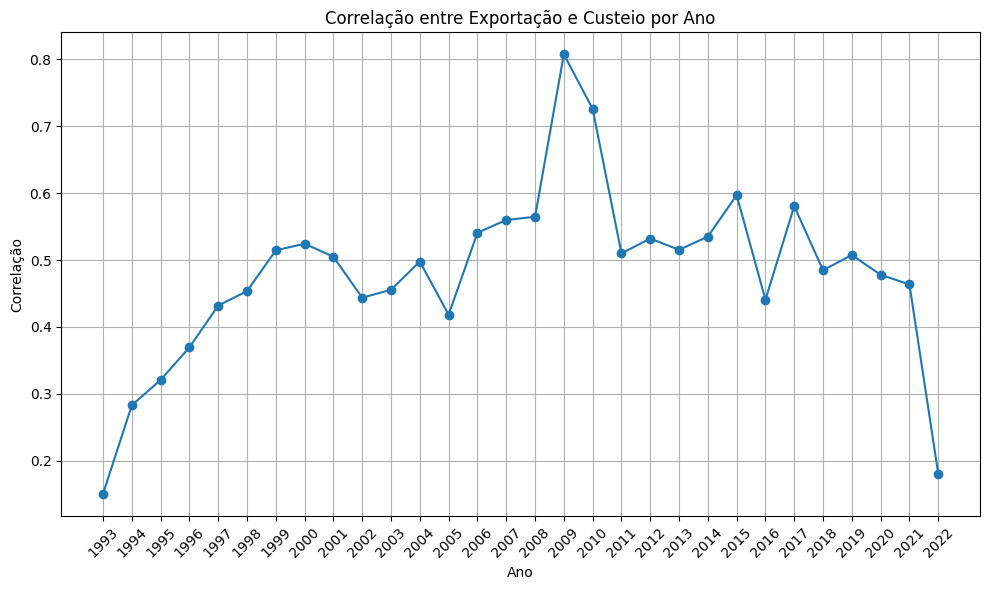

In [16]:
import matplotlib.pyplot as plt

# Criando o gráfico das correlações por ano
plt.figure(figsize=(10, 6))
plt.plot(correlacoes_exportacao_custeio.keys(), correlacoes_exportacao_custeio.values(), marker='o')

# Ajustando o layout
plt.title('Correlação entre Exportação e Custeio por Ano')
plt.xlabel('Ano')
plt.ylabel('Correlação')
plt.grid(True)
plt.xticks(rotation=45)  # Rotacionar os anos para evitar sobreposição

# Exibir o gráfico
plt.tight_layout()
plt.show()


#CORRELAÇÃO EXPORTAÇÃO E CUSTEIO POR REGIAO

In [20]:
import pandas as pd

# Dicionário de mapeamento de siglas para regiões
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

# Função para mapear siglas para regiões
def mapear_regiao(sigla):
    for regiao, siglas in regioes.items():
        if sigla in siglas:
            return regiao
    return 'Desconhecido'

# Carregar os arquivos
file_exportacao = pd.read_excel('/content/exportacao.xlsx')
file_custeio = pd.read_excel('/content/custeio.xlsx')

# Adicionar a coluna de Região
file_exportacao["Região"] = file_exportacao["Sigla"].apply(mapear_regiao)
file_custeio["Região"] = file_custeio["Sigla"].apply(mapear_regiao)

# Selecionar apenas colunas numéricas (evitar erros com colunas de texto)
file_exportacao_numeric = file_exportacao.select_dtypes(include=['int64', 'float64'])
file_custeio_numeric = file_custeio.select_dtypes(include=['int64', 'float64'])

# Identificar os anos que estão presentes em ambos os arquivos
anos_comuns = list(set(file_exportacao_numeric.columns) & set(file_custeio_numeric.columns))

# Criar um dicionário para armazenar as correlações por região e ano
correlacoes_regiao_exportacao_custeio = {}

# Calcular correlação para cada região
for regiao in regioes.keys():
    df_exp = file_exportacao[file_exportacao["Região"] == regiao][anos_comuns]
    df_cust = file_custeio[file_custeio["Região"] == regiao][anos_comuns]

    # Garantir que os DataFrames tenham dados suficientes e os mesmos índices
    if not df_exp.empty and not df_cust.empty:
        df_exp = df_exp.sort_index()
        df_cust = df_cust.sort_index()

        # Alinhar os índices para evitar problemas de dimensão
        df_exp, df_cust = df_exp.align(df_cust, join="inner", axis=0)

        # Calcular a correlação para cada ano
        correlacao = df_exp.corrwith(df_cust, axis=0)
        correlacoes_regiao_exportacao_custeio[regiao] = correlacao

# Criar um DataFrame com as correlações por região
correlacao_regioes_df = pd.DataFrame(correlacoes_regiao_exportacao_custeio)

# Ordenar os anos para exibição clara
correlacao_regioes_df = correlacao_regioes_df.sort_index()

# Exibir a tabela final de correlações
print(correlacao_regioes_df)


           Norte  Nordeste  Centro-Oeste   Sudeste       Sul
1993    0.029681 -0.007216     -0.000908  0.005226 -0.010042
1994    0.041653  0.051745      0.045727 -0.003049  0.004325
1995    0.055566  0.121628      0.050727 -0.010844  0.045253
1996   -0.000452  0.085319      0.035749 -0.000830 -0.009733
1997    0.086416  0.177657      0.054150  0.004333 -0.018242
1998    0.034756  0.151076      0.027332  0.001313 -0.020126
1999    0.032512  0.086338      0.014594 -0.005837 -0.020721
2000    0.066151  0.048919     -0.006267  0.005964 -0.020958
2001    0.028296  0.038516     -0.026217  0.009698 -0.017741
2002    0.198588  0.063387     -0.006315  0.014383 -0.019616
2003    0.221131  0.061202      0.035550  0.015095 -0.015360
2004    0.197509  0.071169      0.022967 -0.001936 -0.015850
2005    0.238157  0.045282     -0.001617 -0.009019 -0.018466
2006    0.193612  0.070717      0.019791 -0.012119 -0.025511
2007    0.127594  0.080584      0.029623 -0.011707 -0.033655
2008    0.091972  0.0647

#VISUALIZAÇÃO CORRELAÇÃO GERAL

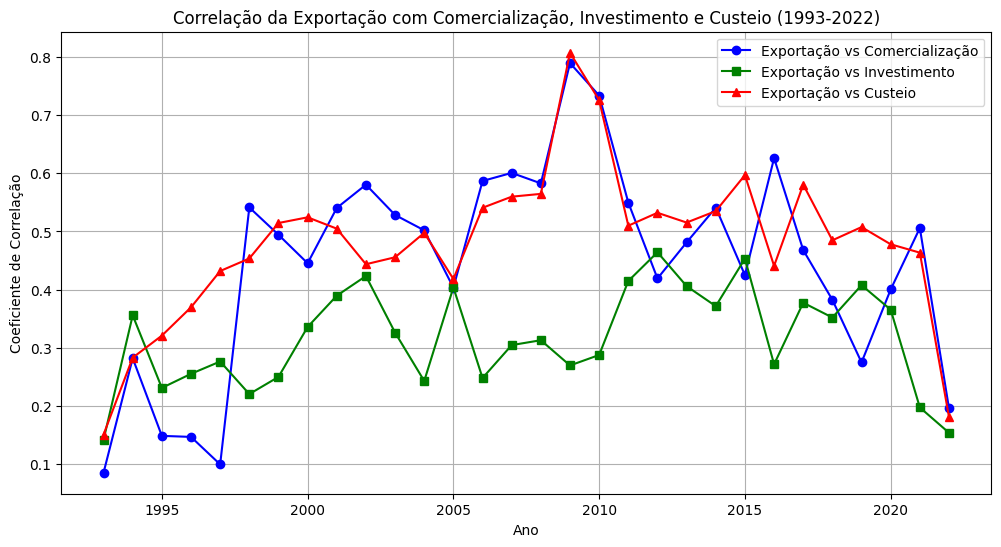

In [17]:
import matplotlib.pyplot as plt

# Dados de correlação
anos = list(range(1993, 2023))

corr_export_comerc = [0.0850, 0.2819, 0.1484, 0.1466, 0.0993, 0.5413, 0.4943, 0.4453, 0.5404, 0.5804,
                      0.5283, 0.5019, 0.4033, 0.5868, 0.6007, 0.5827, 0.7896, 0.7337, 0.5496, 0.4191,
                      0.4812, 0.5410, 0.4249, 0.6261, 0.4679, 0.3823, 0.2747, 0.4002, 0.5059, 0.1955]

corr_export_inv = [0.1417, 0.3557, 0.2309, 0.2551, 0.2763, 0.2203, 0.2498, 0.3357, 0.3895, 0.4233,
                   0.3260, 0.2428, 0.4037, 0.2479, 0.3045, 0.3129, 0.2695, 0.2875, 0.4148, 0.4642,
                   0.4059, 0.3715, 0.4532, 0.2715, 0.3774, 0.3519, 0.4076, 0.3654, 0.1972, 0.1537]

corr_export_cust = [0.1507, 0.2829, 0.3208, 0.3695, 0.4319, 0.4535, 0.5145, 0.5243, 0.5048, 0.4436,
                    0.4556, 0.4976, 0.4182, 0.5407, 0.5598, 0.5646, 0.8074, 0.7258, 0.5099, 0.5321,
                    0.5153, 0.5350, 0.5969, 0.4407, 0.5805, 0.4848, 0.5075, 0.4779, 0.4635, 0.1806]

# Criar o gráfico
plt.figure(figsize=(12,6))
plt.plot(anos, corr_export_comerc, marker='o', linestyle='-', label='Exportação vs Comercialização', color='b')
plt.plot(anos, corr_export_inv, marker='s', linestyle='-', label='Exportação vs Investimento', color='g')
plt.plot(anos, corr_export_cust, marker='^', linestyle='-', label='Exportação vs Custeio', color='r')

# Adicionar título e legendas
plt.xlabel("Ano")
plt.ylabel("Coeficiente de Correlação")
plt.title("Correlação da Exportação com Comercialização, Investimento e Custeio (1993-2022)")
plt.legend()
plt.grid(True)
plt.show()
